<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/roots/Week_4_Root_Finding_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Examples of root finding problems

# PROBLEM 1 
Find E where PsiRight = 0.  Need EVERY root between E= 0 and 50

In [ ]:
def IntegrateTISE(x,V,E,psi0=0,psi1=1e-6):
  '''
  Uses eq (2.7) to calculate Psi by integrating the TISE
  INPUT: x and V arrays, energy E, psi0=psi[0]=psi at x[0], psi1=psi[1]
  RETURNS: psi array
  '''
# INITIALIZE
  psi = np.zeros_like(x)
  psi[0] = psi0
  psi[1] = psi1
  dx = x[1] - x[0]
  N = len(x)

  # MAIN LOOP
  for i in range(2,N):
    thisPsi = psi[i-1]
    lastPsi = psi[i-2]
    psi[i] = 2*thisPsi*(1 - dx**2 * (E-V[i])) - lastPsi # eq 2.7
              
  return psi

In [ ]:
xMax = 1.5
dx = 0.001
x = np.arange(-xMax,xMax+dx,dx)
V = 50*np.heaviside(np.abs(x)-0.5,1) # Heaviside=0 for x<0, 1 for x>0

def PsiRight(E):  # return only the last psi for root finding
  psi = IntegrateTISE(x,V,E)
  return psi[-1]

In [ ]:
PsiRight(10)

-3172.798295974798

In [ ]:
PsiRight(20)

347.71096245619435

# SOLUTIONS

My best advice:
## PLOT the FUNCTION

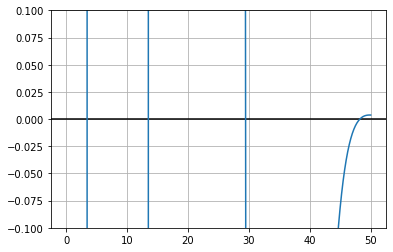

In [ ]:
E = np.linspace(0,50,200)
y = np.zeros_like(E)
for i in range(len(E)):
  e = E[i]
  y[i] = PsiRight(e)

plt.axhline(0, color='k')
plt.plot(E,y)
plt.ylim(-.1,.1)
plt.grid()

In [ ]:
from scipy.optimize import root_scalar

In [ ]:
root_scalar(PsiRight, bracket=[1,5] )

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 3.4135557441253193

In [ ]:
root_scalar(PsiRight,bracket=[10,15] )

      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 13.475651827468985

In [ ]:
root_scalar(PsiRight, bracket=[25,30] )

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 29.452156557535297

In [ ]:
root_scalar(PsiRight, bracket=[40,50] )

      converged: True
           flag: 'converged'
 function_calls: 29
     iterations: 28
           root: 48.227034323456806

In [ ]:
root_scalar(PsiRight, bracket=[5,50] )

      converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 19
           root: 13.475651827469626

# Automatic Root Scanner

In [ ]:
EMIN = 0
EMAX = 50
ELIST = np.linspace(EMIN,EMAX, 200)  # MUST use enough steps!

def f(x):
  return PsiRight(x)

fold = f(EMIN)
Eold = EMIN

roots = []  # empty list

for i in range(1, len(ELIST)):
  Enew = ELIST[i]
  fnew = f(Enew)
  #print(fnew)
  if np.sign(fold)!=np.sign(fnew):   # found a root
    sol = root_scalar(f, bracket=[Eold, Enew])
    if sol.converged:
      roots.append(sol.root)
    print(f"Found root: {sol.root}")
    #print (f"{Eold:10.4f}{Enew:10.4f}{sol.root:10.4f}\t{sol.converged}")
    fold = fnew
    Eold = Enew

print("Roots are:")
print(roots)

Found root: 3.4135557441256195
Found root: 13.475651827469942
Found root: 29.452156557535613
Found root: 48.22703432345641
Roots are:
[3.4135557441256195, 13.475651827469942, 29.452156557535613, 48.22703432345641]
